### Problem Statement

X Education sells online courses to industry professionals. Company markets its product on multiple websites and search engines 
such as google. once people landed on website, they may fill up form for enquiry, they may watch videos or they may browse the
cources on website. if these people filling form with their Email ID and Phone numbers they are considered as lead also 
the leads can be taken from past referrals.
     
  Once the leads are acquired company employees start making calls and Email to these people. Through this process leads get 
converted and while most do not. The current lead conversion rate for X education is 30% of acquired leads. Now company wants to
focus on only those potential lead which can be converted so the employees can invest time to nurture these leads only. Hence 
company wants us to assign score on scale of 1-100 to each lead basis on information collected and on basis of this score 
predict whether lead will get converted or not.

In [1]:
# Importing necessary liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings to avoid unnessary warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Importing Dataset

In [2]:
# For Displaying all rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2. Data Preparation

#### As per understanding taken from problem statement, Replacing 'Select' with 'NAN' as 'Select' showing only when people are selecting nothing for that option

In [7]:
# Replacing 'Select' With 'NAN'
df = df.replace('Select', np.NAN)

In [8]:
# Missing value check
df_null  = (round(df.isnull().mean()*100, 2)).sort_values(ascending = False)
df_null

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### Missing value treatment

In [9]:
# count of columns which have null values more than 30 %
len( df_null[df_null > 30] )

10

Dropping below columns as it has more than 30% missing values which can cause issue to our analysis as well as model building process hence dropping these columns would be a good approach.
1.Lead Quality 
2.Asymmetrique Activity Index
3.Asymmetrique Profile Score
4.Asymmetrique Activity Score
5.Asymmetrique Profile Index
6.How did you hear about X Education
7.Lead Profile
8.City
9.Specialization
10.Tags

In [10]:
#Creating list of columns which needs to be dropped
drop_columns = list( df_null[df_null.values > 30 ].index )
drop_columns

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'City',
 'Specialization',
 'Tags']

In [11]:
# Updating dataframe by removing unnecessary columns
df = df.drop( drop_columns, axis=1)
df.shape

(9240, 27)

In [12]:
# Columns which have null values greater than 0 and needs to be handled
null_value_colm = list( df_null[ (df_null.values > 0) & (df_null.values < 30 )].index )
null_value_colm

['What matters most to you in choosing a course',
 'What is your current occupation',
 'Country',
 'Page Views Per Visit',
 'TotalVisits',
 'Last Activity',
 'Lead Source']

In [13]:
len(null_value_colm)

7

In [14]:
# Checking count of categories under reason of choosing course 
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### As we can see from above code 'better carrer prospects' category has occured most and only category with very high frequency hence we can drop this column as well as it will not any benificial information to our model

In [15]:
# Dropping 'What matters most to you in choosing a course' coulmn
df = df.drop('What matters most to you in choosing a course', axis=1)

In [16]:
# Checking count of categories under current occupation 
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [17]:
df['What is your current occupation'].mode()[0]

'Unemployed'

As we can see from above code 'Unemployed' category has occured most hence replacing all missing values with this category would be good approach and wont impact our analysis

In [18]:
# Replacing missing values with mode ()
df['What is your current occupation'].fillna(value = df['What is your current occupation'].mode()[0], inplace= True )

In [19]:
df['What is your current occupation'].isnull().sum()

0

In [20]:
# Checking count of categories under country column
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

#### As we can see from above code Most of the people are from 'India' hence considering other countries for our model building and analysis will not that much efficient hence dropping this column at start will be the good approach

In [21]:
# Dropping 'Country' coulmn
df = df.drop('Country', axis=1)

In [22]:
# Checking value count of 'Page Views Per Visit' column
df['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.80        9
14.00       9
4.33        9
2.20        9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
1.83        4
3.40        4
2.60        4
1.43        4
15.00       4
1.71        4
1.78        3
4.25        3
16.00       3
4.75        3
5.67        3
1.57        3
1.38        3
3.60        2
1.23        2
1.56        2
5.40        2
2.22        2
7.50        2
1.14        2
5.25        2
2.09        2
3.20        2
3.75        2
5.33        2
2.83        2
2.71        2
1.22        2
2.13        1
1.54        1
6.67  

In [23]:
# Checking mean and median of 'Page Views Per Visit'
print(df['Page Views Per Visit'].median())
print(df['Page Views Per Visit'].mean())

2.0
2.3628199494672084


In [24]:
# Replacing missing values with median of 'Page Views Per Visit' column
df['Page Views Per Visit'].fillna(value= df['Page Views Per Visit'].median(), inplace = True)

In [25]:
df['Page Views Per Visit'].isnull().sum()

0

In [26]:
df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [27]:
# Checking mean and median of 'Page Views Per Visit'
print(df['TotalVisits'].median())
print(df['TotalVisits'].mean())

3.0
3.445237833681204


In [28]:
# Replacing missing values with median of 'TotalVisits' column
df['TotalVisits'].fillna(value= df['TotalVisits'].median(), inplace = True )

In [29]:
df['TotalVisits'].isnull().sum()

0

In [30]:
# Checking count of categories under 'Last Activity' column
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

As we can see from above code 'Email Opened' category has occured most in 'Last activity' column and percentage of missing value is also very less hence replacing all missing values Mode would be good approach and wont impact our analysis

In [31]:
df['Last Activity'].fillna(value= df['Last Activity'].mode()[0], inplace = True )

In [32]:
df['Last Activity'].isnull().sum()

0

In [33]:
# Checking count of categories under 'Lead Source' column
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

As we can see from above code 'Google' category has occured most in 'Lead Source' column and percentage of missing value is also very less hence replacing all missing values Mode would be good approach and wont impact our analysis

In [34]:
df['Lead Source'].fillna(value= df['Lead Source'].mode()[0], inplace = True )

In [35]:
df['Lead Source'].isnull().sum()

0

In [36]:
# Checking Missing value percentage after Handling
round(df.isnull().mean()*100, 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [37]:
df.shape

(9240, 25)

#### Checking distribution of binary variable

In [38]:
Binary_var = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
              'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
             'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 
             'A free copy of Mastering The Interview']

In [39]:
for i in Binary_var:
    print('*'*25, i , '*'*25)
    print(df[i].value_counts())
    print('\n')

************************* Do Not Email *************************
No     8506
Yes     734
Name: Do Not Email, dtype: int64


************************* Do Not Call *************************
No     9238
Yes       2
Name: Do Not Call, dtype: int64


************************* Search *************************
No     9226
Yes      14
Name: Search, dtype: int64


************************* Magazine *************************
No    9240
Name: Magazine, dtype: int64


************************* Newspaper Article *************************
No     9238
Yes       2
Name: Newspaper Article, dtype: int64


************************* X Education Forums *************************
No     9239
Yes       1
Name: X Education Forums, dtype: int64


************************* Newspaper *************************
No     9239
Yes       1
Name: Newspaper, dtype: int64


************************* Digital Advertisement *************************
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64


*********

#### As we can see from above code, There is no as such variance in above column except 'A free copy of Mastering The Interview' column hence dropping these will not impact out analysis hence dropping above binary columns.

In [40]:
df = df.drop(['Do Not Email','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
              'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
             'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'],axis=1)

In [41]:
df.shape

(9240, 12)

In [42]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [44]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [45]:
ID_column = ['Prospect ID', 'Lead Number' ]
Cat_Column = ['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity'
              ,'Converted','A free copy of Mastering The Interview']
Num_Column = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [46]:
## Step 3 : Visualization 

### Univariate Analysis

#### Data Imbalance

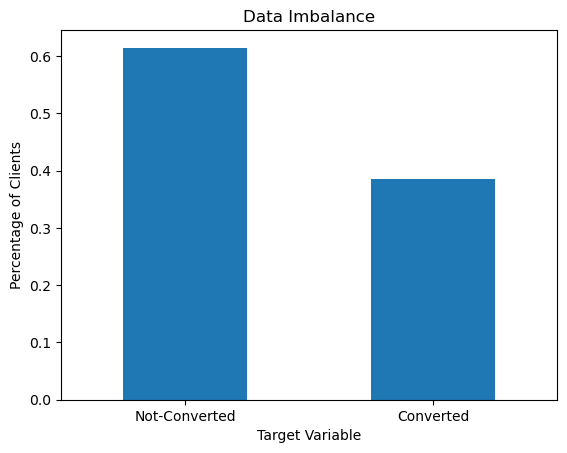

In [47]:
df["Converted"].value_counts(normalize=True).reset_index()['Converted'].plot.bar()
plt.title('Data Imbalance')
plt.xlabel('Target Variable')
plt.ylabel('Percentage of Clients')
plt.xticks((0,1),['Not-Converted','Converted'], rotation=0)
plt.show()

In [48]:
## Spliting application data set on basis of target variable

Not_Converted   = df [ df['Converted'] == 0 ]
Converted       = df [ df['Converted'] == 1 ]

# Percentage of data imbalace in target variable :
print('Not_Converted % = ', round(len(Not_Converted)*100 / len(df),2) )
print('Converted % = ', round(len(Converted)*100 / len(df),2) )

Not_Converted % =  61.46
Converted % =  38.54


In [49]:
# Checking Distribution of categorical columns

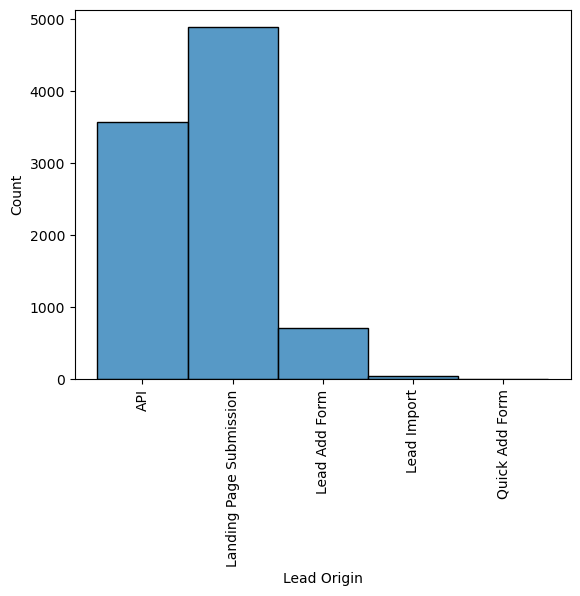

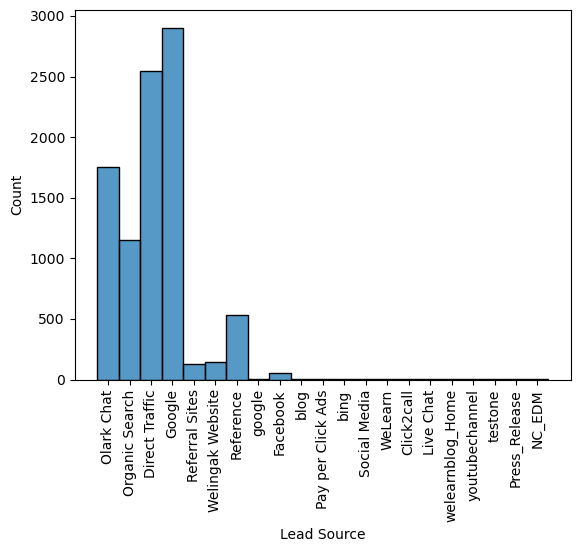

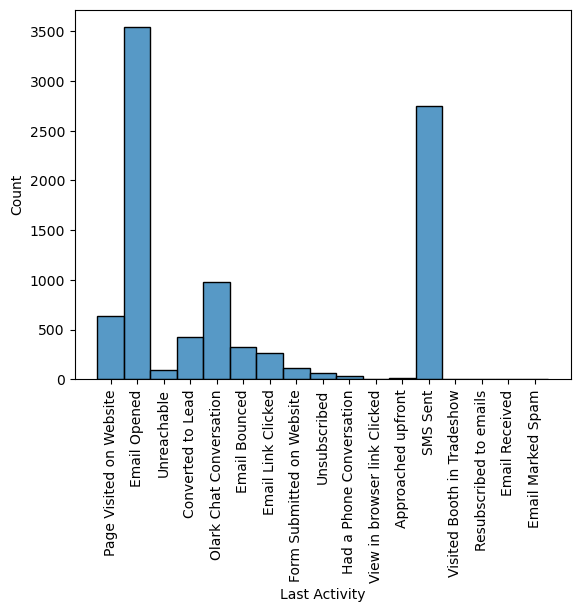

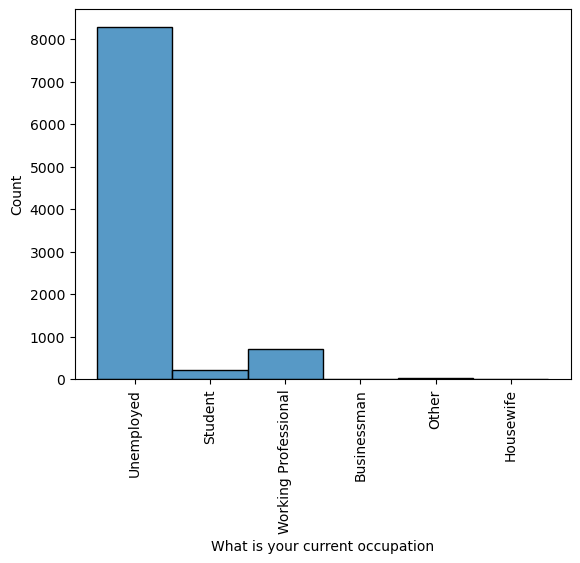

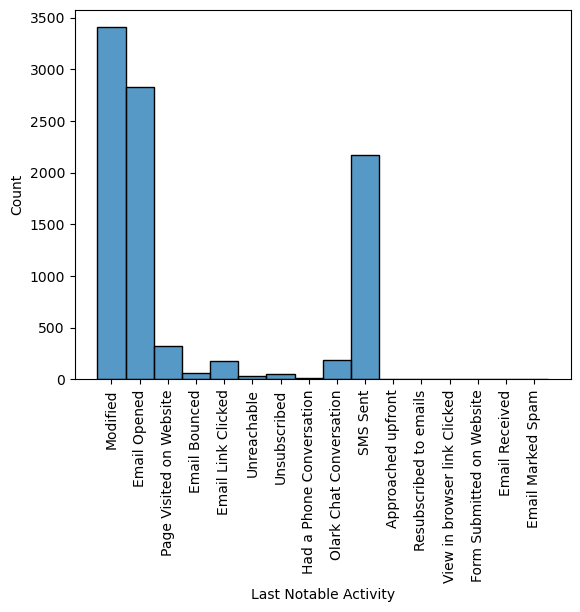

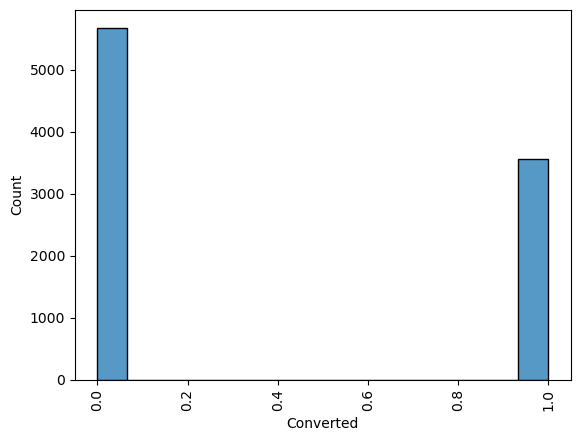

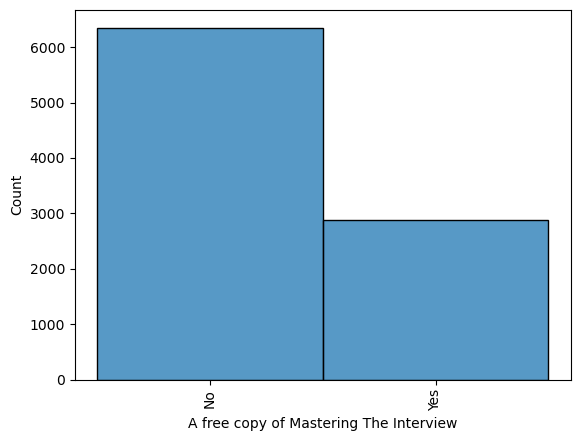

In [50]:
for i in Cat_Column:
    sns.histplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

#### Inferences :
- Most of the leads are originated from 'API' & 'Landing page submission'
- 'Google' and 'Direct traffic' are the source of leads maximum times followed by olark chat and Organic search
- 'Email' and 'SMS' are the last activity in case of many users
- Most of the peoples are unemployed 
- 'Email', 'SMS' & 'Modified are the most notable activity from peoples.
- 40% peoples are converting.

In [51]:
# Cheking distribution of numerical column

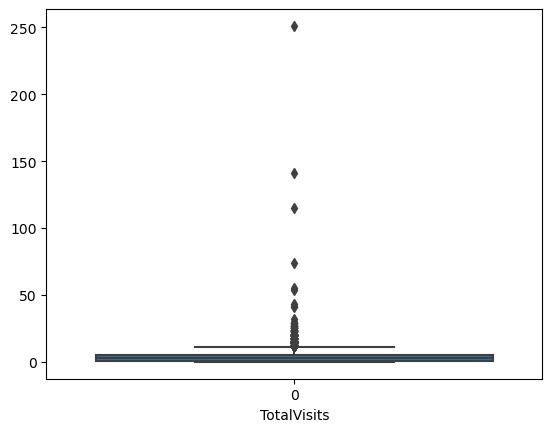

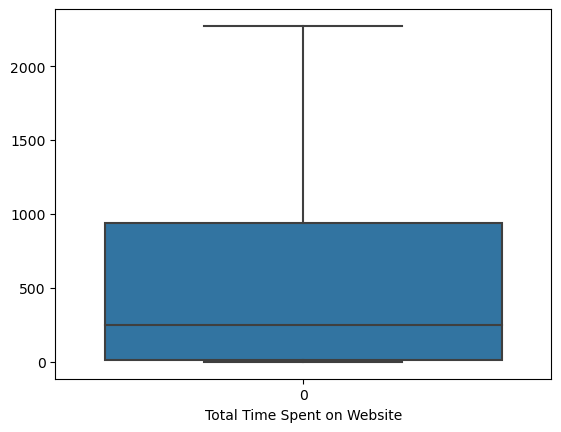

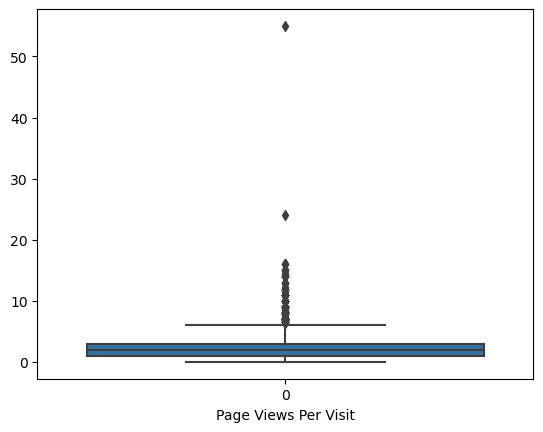

In [52]:
for i in Num_Column:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

#### Inference :
- 1.'Page Views Per Visit' & 'TotalVisits' columns have some outliers which needs to be handled.
- 2.'Total Time Spent on Website' variable has No outliers present hence no outlier treatment required for this variable.

### Bivariate Analysis

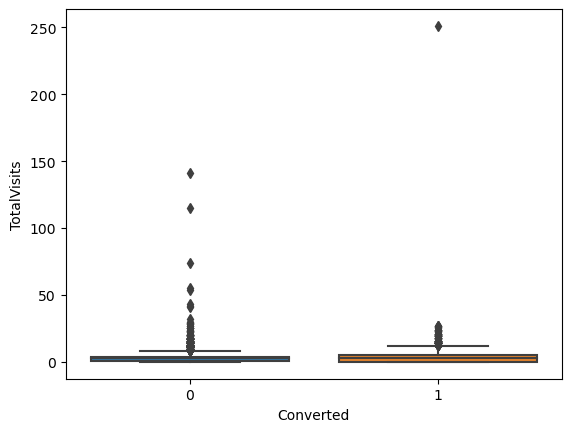

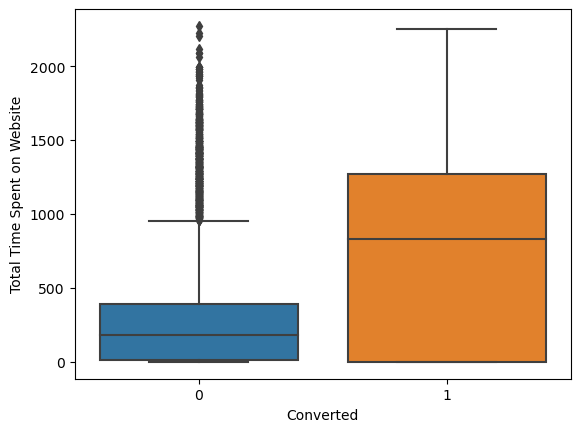

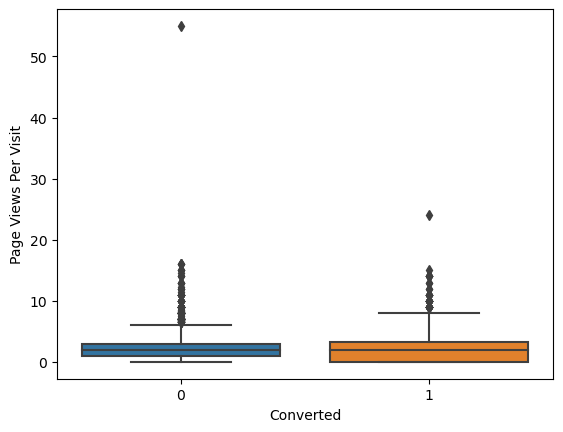

In [53]:
for i in Num_Column:
    sns.boxplot(x=df['Converted'], y=df[i])
    plt.show()

#### Inferences:
- 'Total Visits' & ' Page views per Visit' variables are not making big difference in terms of target variable.
- 'Peoples who are spending more time on websites are more likely to convert.

#### Multivariate Analysis

In [54]:
# Checking Correlation between numerical variable and Target variable

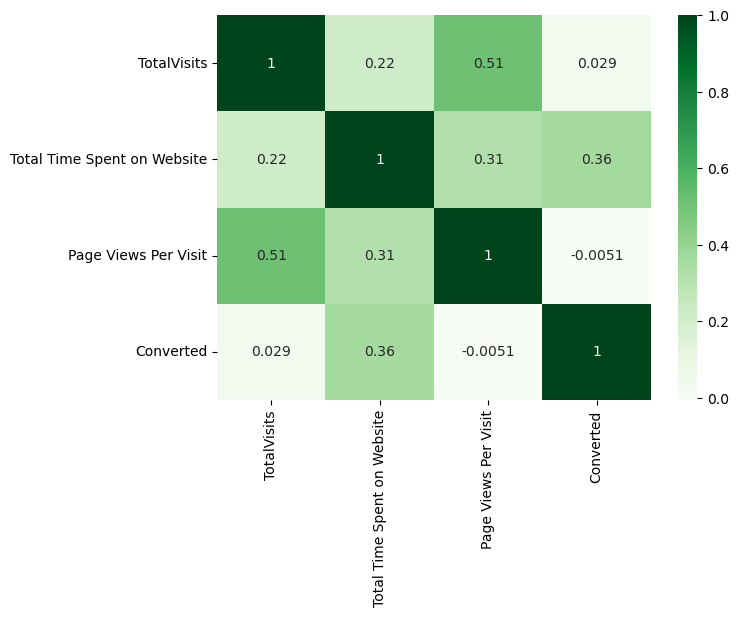

In [55]:
plt.figure(figsize=[7,5])
sns.heatmap(df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit','Converted']].corr(), 
            annot=True, cmap ="Greens")
plt.show()

#### Inferences:
- There is no as such correlation between 'TotalVisits','Total time spent on website','Page views per visit' with target variable

## Step 4 : Transformation of data

In [56]:
# Creating list of variable which is having binary variables

Final_Binary_var = ['A free copy of Mastering The Interview']

# Defining map function
def Binary_map (x):
    return x.map({'Yes': 1, 'No': 0})

df[Final_Binary_var] = df[Final_Binary_var].apply(Binary_map)

In [57]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


In [58]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Creating dummy variable for multiple categories column

In [59]:
# Creating dummy variable for 'Lead Origin'
m1 = pd.get_dummies(df['Lead Origin'], prefix='Lead_Origin', drop_first=True)
df = pd.concat([df, m1], axis=1)

In [60]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,1,0,0,0


In [61]:
df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [62]:
# Replacing 'google' with 'Google' as both are same
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')
 

# creating category 'Others' category under 'Lead Source' column to avoid multiple dummy variable for single digit counts
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Social Media', 'Press_Release','youtubechannel','welearnblog_Home',
                     'WeLearn','blog','Pay per Click Ads','testone','NC_EDM','Live Chat'], 'Others')

In [63]:
df['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

In [64]:
# Creating dummy variable for 'Lead Source'
m2 = pd.get_dummies(df['Lead Source'], prefix='Lead Source', drop_first=True)
df = pd.concat([df, m2], axis=1)

In [65]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0


In [66]:
df['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [67]:
# Replacing all low occuerence values with 'Others' as creating separate variable for these categories will not be helpful for our analysis
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 
                                    'Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam',
                                    'Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

df['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [68]:
# Creating dummy variable for 'Last Activity'
m3 = pd.get_dummies(df['Last Activity'], prefix='Last Activity', drop_first=True)
df = pd.concat([df, m3], axis=1)

In [69]:
df.shape

(9240, 32)

In [70]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
# Checking count of values for 'What is your current occupation' column
df['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [72]:
# Replacing all low occuerence values with 'Other' as creating separate variable for these categories will not be helpful for our analysis
df['What is your current occupation'] = df['What is your current occupation'].replace(['Housewife','Businessman'], 'Other')

In [73]:
# Creating dummy variable for 'What is your current occupation' column
m4 = pd.get_dummies(df['What is your current occupation'],prefix='current occupation', drop_first=True)

df = pd.concat([df, m4], axis =1)

In [74]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,current occupation_Student,current occupation_Unemployed,current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [75]:
# Checking value count for 'Last Notable Activity' column
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [76]:
# Replacing all low occurence categories with 'Misc.' as it will not be helpful if create separate dummy variables for each 
# of these low occurence categories

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
                              'Had a Phone Conversation','Email Marked Spam','Approached upfront','Resubscribed to emails', 
                              'View in browser link Clicked','Form Submitted on Website','Email Received'], 'Misc.')

In [77]:
# Creating dummy variable for 'Last Notable Activity' column
m5 = pd.get_dummies(df['Last Notable Activity'],prefix='Last Notable Activity', drop_first=True)

df = pd.concat([df, m5], axis =1)

In [78]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,current occupation_Student,current occupation_Unemployed,current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Misc.,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [79]:
df.shape

(9240, 41)

#### Dropping the repeated variables

In [80]:
# Dropping columns for which we have created dummy variable
drop_dummy = ['Lead Origin','Lead Source','Last Activity','What is your current occupation','A free copy of Mastering The Interview',
             'Last Notable Activity']

df = df.drop(drop_dummy, axis=1)

In [81]:
df.shape

(9240, 35)

### Checking numerical columns

In [82]:
df[['Page Views Per Visit','TotalVisits','Total Time Spent on Website']].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,Page Views Per Visit,TotalVisits,Total Time Spent on Website
count,9240.000000,9240.000000,9240.000000
mean,2.357440,3.438636,487.698268
std,2.145781,4.819024,548.021466
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.000000
50%,2.000000,3.000000,248.000000
75%,3.000000,5.000000,936.000000
90%,5.000000,7.000000,1380.000000
95%,6.000000,10.000000,1562.000000


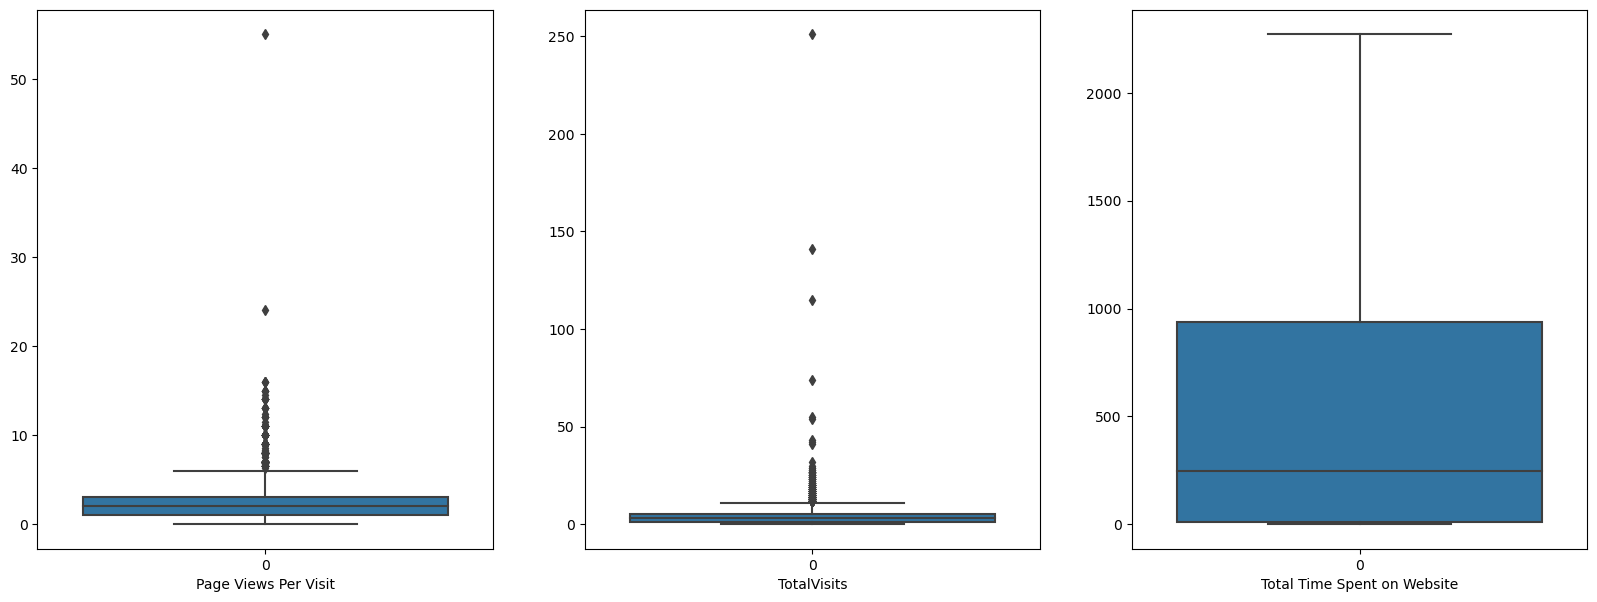

In [83]:
# Checking outlier for 'Page Views Per Visit','TotalVisits','Total Time Spent on Website'
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
sns.boxplot(df['Page Views Per Visit'])
plt.xlabel('Page Views Per Visit')

plt.subplot(1,3,2)
sns.boxplot(df['TotalVisits'])
plt.xlabel('TotalVisits')

plt.subplot(1,3,3)
sns.boxplot(df['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')

plt.show()

#### Inference :
- 1.'Page Views Per Visit' column has some outliers which needs to be handled.
- 2.'TotalVisits' variable has some outliers which needs to be handled
- 3.'Total Time Spent on Website' variable has No outliers present hence no outlier treatment required for this variable.

for above 1st and 2nd variable we can use capping approach to reduce the outliers present in data, here we can capped higher range to (Q1 + 1.5*IQR) quantile and lower range to (Q1 - 1.5*IQR) quantile.

In [84]:
df.shape

(9240, 35)

#### Outlier treatment for 'Page Views Per Visit','TotalVisits'

In [85]:
# Removing statistical outliers of 'Page Views Per Visit' column
Q1 = df['Page Views Per Visit'].quantile(0.05)
Q3 = df['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
df = df[(df['Page Views Per Visit'] >= (Q1 - 1.5*IQR)) & (df['Page Views Per Visit'] <= (Q3 + 1.5*IQR))]

# Removing statistical outliers of 'TotalVisits' column
Q1 = df['TotalVisits'].quantile(0.05)
Q3 = df['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
df = df[(df['TotalVisits'] >= (Q1 - 1.5*IQR)) & (df['TotalVisits'] <= (Q3 + 1.5*IQR))]

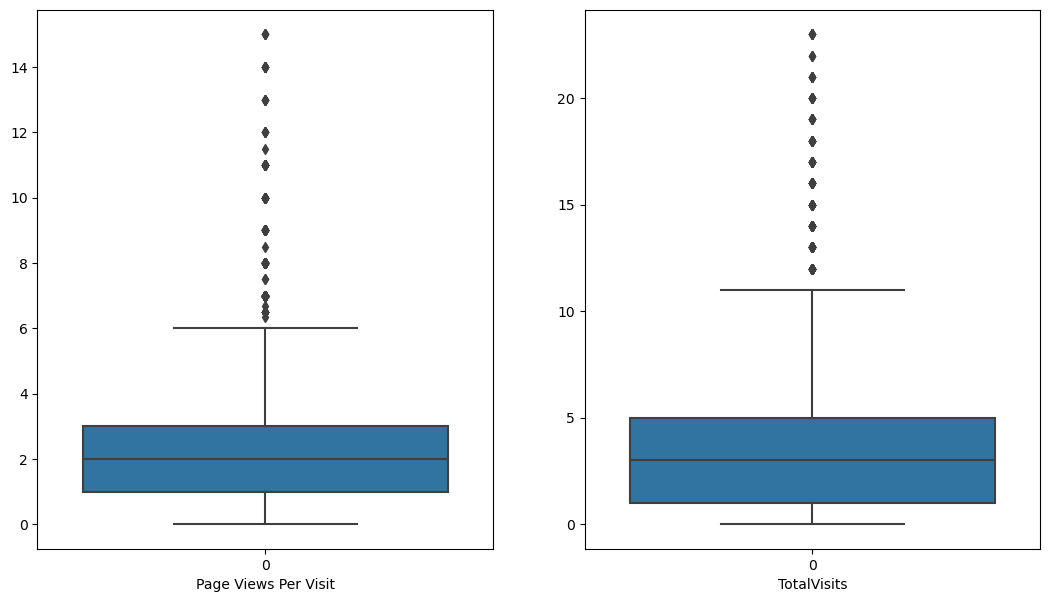

In [86]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
sns.boxplot(df['Page Views Per Visit'])
plt.xlabel('Page Views Per Visit')

plt.subplot(1,3,2)
sns.boxplot(df['TotalVisits'])
plt.xlabel('TotalVisits')

plt.show()

In [87]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
percentiles

array([0., 6.])

In [88]:
df.shape

(9205, 35)

In [89]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Origin_Lead Import', 'Lead_Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'current occupation_Student', 'current occupation_Unemployed',
       'current occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Misc.',

In [90]:
# Checking the percentage of missing value
round(df.isnull().mean()*100, 4)

Prospect ID                                      0.0
Lead Number                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Lead_Origin_Landing Page Submission              0.0
Lead_Origin_Lead Add Form                        0.0
Lead_Origin_Lead Import                          0.0
Lead_Origin_Quick Add Form                       0.0
Lead Source_Facebook                             0.0
Lead Source_Google                               0.0
Lead Source_Olark Chat                           0.0
Lead Source_Organic Search                       0.0
Lead Source_Others                               0.0
Lead Source_Reference                            0.0
Lead Source_Referral Sites                       0.0
Lead Source_Welingak Website                     0.0
Last Activity_Email Bounced                   

### Step 5 : Train - Test Split

In [91]:
# Importing sciket learn library
from sklearn.model_selection import train_test_split

In [92]:
df.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,current occupation_Student,current occupation_Unemployed,current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Misc.,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [93]:
# Removing 'Prospect ID', 'Lead Number' & 'Converted'
X = df.drop( ['Prospect ID','Lead Number', 'Converted'], axis=1 )

In [94]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,current occupation_Student,current occupation_Unemployed,current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Misc.,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [95]:
# Putting response variable to 'y'
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [96]:
# Spliting dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size= 0.3, random_state= 100 )

### Step 6 : Standardization of data

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform( X_train[[ 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' ]])

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform( X_test[[ 'TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,current occupation_Student,current occupation_Unemployed,current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Misc.,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5300,-1.035716,-0.888045,-1.148419,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2178,0.537984,-0.716268,1.297330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
8214,-1.035716,-0.888045,-1.148419,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
8886,-0.406236,1.483939,-0.659269,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
7918,0.223244,1.628305,-0.170119,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


### Step 7: Looking at Correlations

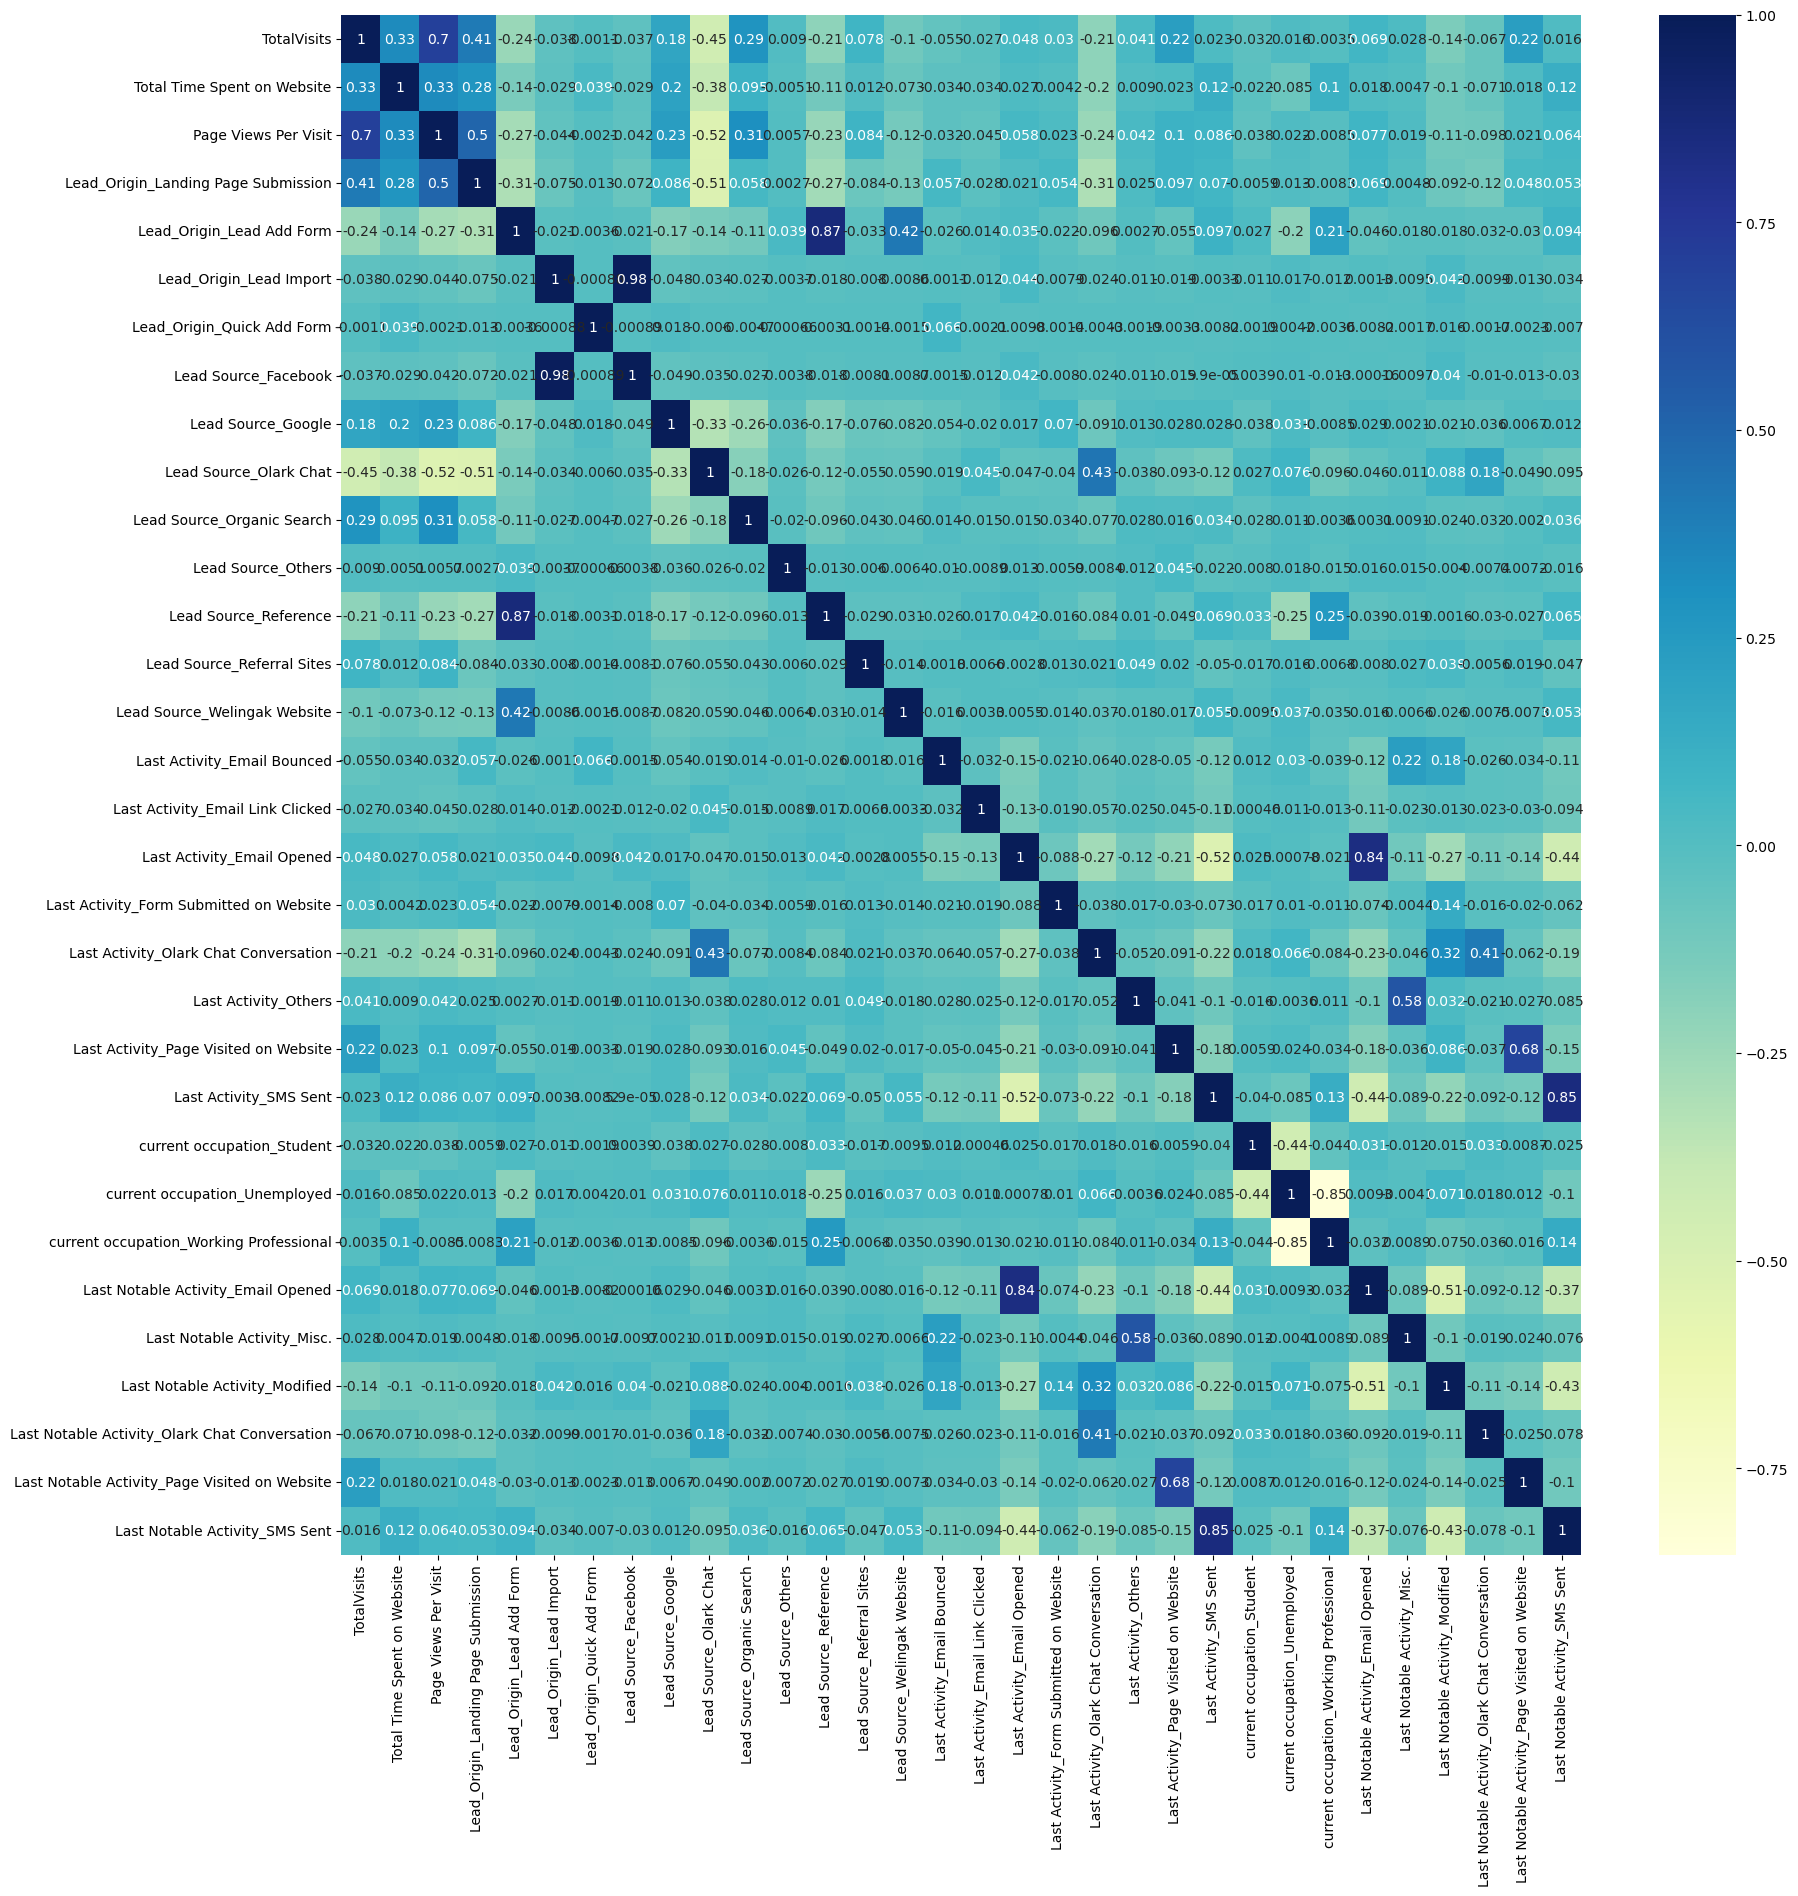

In [99]:
plt.figure(figsize=[20,20])
sns.heatmap(X_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### Inference:
1. 'Last_Activity_SMS Sent' & ' Last Notable Activity_SMS Sent'
2. 'Last Activity_Pages visited on websites' & 'Last Notable Activity_Pages visited on websites'
3. 'Last_Activity_Email Opened' & ' Last Notable Activity_Email Opened'
4. 'Lead Source reference' & ' Lead_Origin_Lead Add Form'
5. 'Lead Source_Facebook' & 'Lead_Origin_Lead_ Import'
6. 'Total Visits' & 'Page Views per visit'
7. 'current occupation_Unemployed' &  'current occupation_Working Professional'

- above pair of variables are highly correlated with each other hence dropping either one would good approach.

In [100]:
# Dropping highly correlated variables

X_train = X_train.drop(['Last Notable Activity_SMS Sent' , 'Last Notable Activity_Page Visited on Website' , 
                        'Last Notable Activity_Email Opened', 'Lead_Origin_Lead Add Form' , 'Lead_Origin_Lead Import' , 
                       'Page Views Per Visit', 'current occupation_Working Professional'], axis=1)

X_test = X_test.drop(['Last Notable Activity_SMS Sent' , 'Last Notable Activity_Page Visited on Website' , 
                        'Last Notable Activity_Email Opened', 'Lead_Origin_Lead Add Form' , 'Lead_Origin_Lead Import' , 
                       'Page Views Per Visit', 'current occupation_Working Professional'], axis=1)

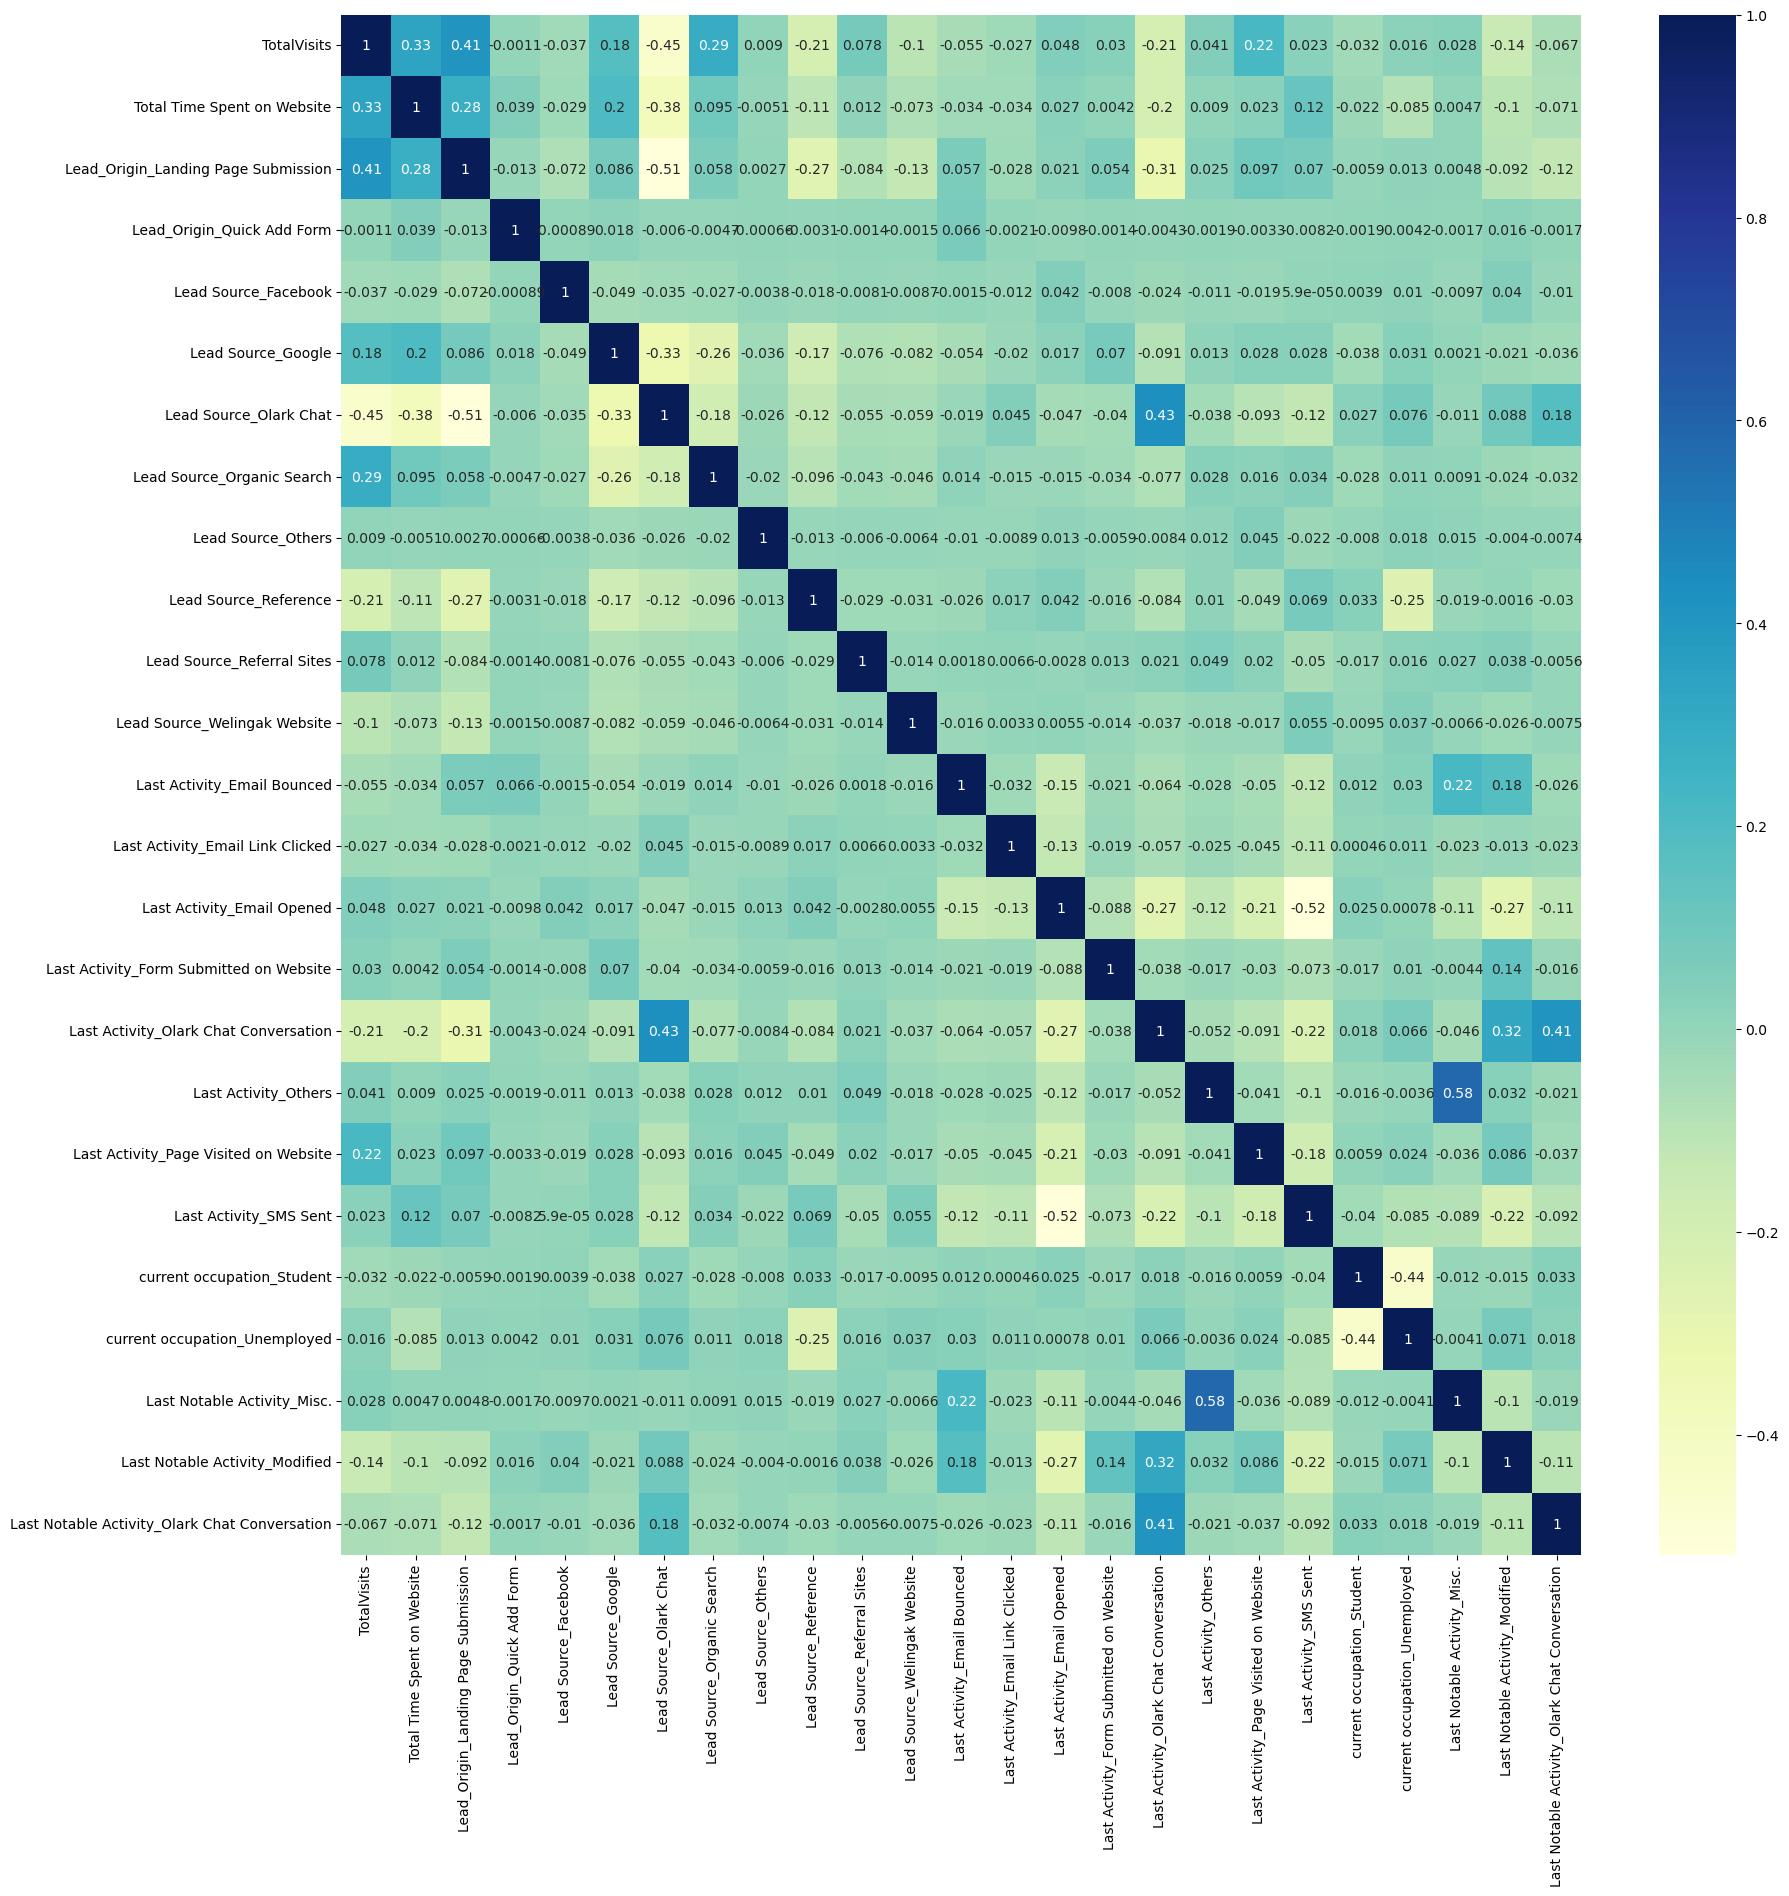

In [101]:
# After dropping highly correlated variables now let's check the correlation matrix again.

plt.figure(figsize=[20,20])
sns.heatmap(X_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [102]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead_Origin_Landing Page Submission,Lead_Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,current occupation_Student,current occupation_Unemployed,Last Notable Activity_Misc.,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
5300,-1.035716,-0.888045,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2178,0.537984,-0.716268,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
8214,-1.035716,-0.888045,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
8886,-0.406236,1.483939,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
7918,0.223244,1.628305,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


## Step 8: Feature selection using RFE

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
logreg = LogisticRegression()

In [105]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [106]:
rfe.support_

array([False,  True, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True])

In [107]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Lead_Origin_Landing Page Submission', False, 2),
 ('Lead_Origin_Quick Add Form', False, 3),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 7),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 8),
 ('Last Activity_SMS Sent', True, 1),
 ('current occupation_Student', True, 1),
 ('current occupation_Unemployed', True, 1),
 ('Last Notable Activity_Misc.', False, 6),
 ('Last Notable Acti

In [108]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'current occupation_Student',
       'current occupation_Unemployed', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [109]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Notable Activity_Misc.'],
      dtype='object')

## Step 9 : Model building

In [110]:
import statsmodels.api as sm

In [111]:
X_train_sm = sm.add_constant(X_train[col])
Model_01 = sm.GLM(y_train, X_train_sm, sm.families.Binomial() ).fit()
Model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6443
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.3
Date:                Tue, 09 Jan 2024   Deviance:                       5492.6
Time:                        20:35:10   Pearson chi2:                 7.12e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3842
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.1816      0.199      5.926      0.000       0.791       1.572
Total Time Spent on Website                       1.0982      0.039     27.994      0.000       1.021       1.175
Lead Source_Olark Chat                            1.2310      0.101     12.231      0.000       1.034       1.428
Lead Source_Others                                0.9937      0.537      1.850      0.064      -0.059       2.046
Lead Source_Reference                             3.7847      0.209     18.125      0.000       3.375       4.194
Lead Source_Referral Sites                       -0.2505      0.346     -0.723      0.470      -0.930       0.429
Lead Source_Welingak Website                     26.2658   1.26e+04      0.002      0.998   -2.47e+04    2.47e+04
Last Activity_Email Bounced                      -0.9993      0.310     -3.219      0.001      -1.608      -0.391
Last Activity_Email Opened                        0.4273      0.115      3.723      0.000       0.202       0.652
Last Activity_Olark Chat Conversation            -0.6128      0.207     -2.954      0.003      -1.019      -0.206
Last Activity_Others                              0.9697      0.233      4.167      0.000       0.514       1.426
Last Activity_SMS Sent                            1.5135      0.116     13.031      0.000       1.286       1.741
current occupation_Student                       -2.1818      0.278     -7.853      0.000      -2.726      -1.637
current occupation_Unemployed                    -2.7356      0.178    -15.333      0.000      -3.085      -2.386
Last Notable Activity_Modified                   -0.8112      0.086     -9.427      0.000      -0.980      -0.643
Last Notable Activity_Olark Chat Conversation    -0.5363      0.370     -1.451      0.147      -1.261       0.188
=================================================================================================================
"""

Dropping 'Lead Source_Welingak Website' variable as it has very high p-value 

In [112]:
X_train_sm = X_train_sm.drop('Lead Source_Welingak Website',axis=1)

X_test_sm = sm.add_constant(X_test[col], has_constant='add')
X_test_sm = X_test_sm.drop('Lead Source_Welingak Website',axis=1)

#### Model 02

In [113]:
Model_02 = sm.GLM(y_train, X_train_sm, sm.families.Binomial() ).fit()
Model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6443
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2902.1
Date:                Tue, 09 Jan 2024   Deviance:                       5804.2
Time:                        20:35:10   Pearson chi2:                 7.00e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3536
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.1695      0.196      5.953      0.000       0.784       1.555
Total Time Spent on Website                       0.9906      0.037     26.537      0.000       0.917       1.064
Lead Source_Olark Chat                            1.0017      0.097     10.283      0.000       0.811       1.193
Lead Source_Others                                0.8491      0.531      1.599      0.110      -0.192       1.890
Lead Source_Reference                             3.5566      0.207     17.207      0.000       3.151       3.962
Lead Source_Referral Sites                       -0.3381      0.338     -0.999      0.318      -1.002       0.325
Last Activity_Email Bounced                      -0.9441      0.297     -3.184      0.001      -1.525      -0.363
Last Activity_Email Opened                        0.4774      0.111      4.305      0.000       0.260       0.695
Last Activity_Olark Chat Conversation            -0.6305      0.205     -3.083      0.002      -1.031      -0.230
Last Activity_Others                              0.9024      0.227      3.969      0.000       0.457       1.348
Last Activity_SMS Sent                            1.5585      0.112     13.870      0.000       1.338       1.779
current occupation_Student                       -2.1258      0.274     -7.769      0.000      -2.662      -1.590
current occupation_Unemployed                    -2.6254      0.177    -14.867      0.000      -2.971      -2.279
Last Notable Activity_Modified                   -0.7643      0.083     -9.254      0.000      -0.926      -0.602
Last Notable Activity_Olark Chat Conversation    -0.3709      0.356     -1.041      0.298      -1.069       0.327
=================================================================================================================
"""

#### Dropping 'Lead Source_Referral Sites' variable as it has p-value greater than threshold value i.e 0.05

In [114]:
X_train_sm = X_train_sm.drop('Lead Source_Referral Sites',axis=1)
X_test_sm = X_test_sm.drop('Lead Source_Referral Sites',axis=1)

#### Model 03

In [115]:
Model_03 = sm.GLM(y_train, X_train_sm, sm.families.Binomial() ).fit()
Model_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6443
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2902.6
Date:                Tue, 09 Jan 2024   Deviance:                       5805.2
Time:                        20:35:10   Pearson chi2:                 7.00e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3535
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.1628      0.196      5.924      0.000       0.778       1.547
Total Time Spent on Website                       0.9909      0.037     26.542      0.000       0.918       1.064
Lead Source_Olark Chat                            1.0071      0.097     10.352      0.000       0.816       1.198
Lead Source_Others                                0.8551      0.531      1.610      0.107      -0.186       1.896
Lead Source_Reference                             3.5615      0.207     17.234      0.000       3.156       3.967
Last Activity_Email Bounced                      -0.9428      0.296     -3.180      0.001      -1.524      -0.362
Last Activity_Email Opened                        0.4792      0.111      4.323      0.000       0.262       0.696
Last Activity_Olark Chat Conversation            -0.6357      0.205     -3.108      0.002      -1.037      -0.235
Last Activity_Others                              0.8907      0.227      3.922      0.000       0.446       1.336
Last Activity_SMS Sent                            1.5626      0.112     13.915      0.000       1.342       1.783
current occupation_Student                       -2.1221      0.274     -7.756      0.000      -2.658      -1.586
current occupation_Unemployed                    -2.6248      0.177    -14.868      0.000      -2.971      -2.279
Last Notable Activity_Modified                   -0.7653      0.083     -9.268      0.000      -0.927      -0.603
Last Notable Activity_Olark Chat Conversation    -0.3673      0.356     -1.031      0.302      -1.065       0.331
=================================================================================================================
"""

#### As we can see from above model ,'Last Notable Activity_Olark Chat Conversation' variable has p-value greater than threshold value hence dropping that variable

In [116]:
X_train_sm = X_train_sm.drop('Last Notable Activity_Olark Chat Conversation',axis=1)
X_test_sm = X_test_sm.drop('Last Notable Activity_Olark Chat Conversation',axis=1)

#### Model 04

In [117]:
Model_04 = sm.GLM(y_train, X_train_sm, sm.families.Binomial() ).fit()
Model_04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6443
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2903.2
Date:                Tue, 09 Jan 2024   Deviance:                       5806.3
Time:                        20:35:11   Pearson chi2:                 7.02e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3534
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.1556      0.196      5.886      0.000       0.771       1.540
Total Time Spent on Website               0.9894      0.037     26.537      0.000       0.916       1.062
Lead Source_Olark Chat                    1.0059      0.097     10.343      0.000       0.815       1.197
Lead Source_Others                        0.8604      0.531      1.620      0.105      -0.181       1.901
Lead Source_Reference                     3.5551      0.206     17.219      0.000       3.150       3.960
Last Activity_Email Bounced              -0.9448      0.296     -3.188      0.001      -1.526      -0.364
Last Activity_Email Opened                0.4880      0.110      4.417      0.000       0.271       0.705
Last Activity_Olark Chat Conversation    -0.7376      0.183     -4.023      0.000      -1.097      -0.378
Last Activity_Others                      0.8937      0.227      3.939      0.000       0.449       1.338
Last Activity_SMS Sent                    1.5698      0.112     14.011      0.000       1.350       1.789
current occupation_Student               -2.1310      0.273     -7.792      0.000      -2.667      -1.595
current occupation_Unemployed            -2.6291      0.177    -14.878      0.000      -2.975      -2.283
Last Notable Activity_Modified           -0.7446      0.080     -9.310      0.000      -0.901      -0.588
=========================================================================================================
"""

#### Dropping 'Lead Source_Others' variable , as it has p-value greater than threshold value.

In [118]:
X_train_sm = X_train_sm.drop('Lead Source_Others' ,axis=1)
X_test_sm = X_test_sm.drop('Lead Source_Others',axis=1)

#### Model 5

In [119]:
Model_05 = sm.GLM(y_train, X_train_sm, sm.families.Binomial() ).fit()
Model_05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6443
Model:                            GLM   Df Residuals:                     6431
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2904.4
Date:                Tue, 09 Jan 2024   Deviance:                       5808.8
Time:                        20:35:11   Pearson chi2:                 7.02e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3532
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.1588      0.196      5.904      0.000       0.774       1.543
Total Time Spent on Website               0.9879      0.037     26.516      0.000       0.915       1.061
Lead Source_Olark Chat                    1.0003      0.097     10.296      0.000       0.810       1.191
Lead Source_Reference                     3.5500      0.206     17.199      0.000       3.145       3.954
Last Activity_Email Bounced              -0.9491      0.296     -3.204      0.001      -1.530      -0.368
Last Activity_Email Opened                0.4861      0.110      4.401      0.000       0.270       0.703
Last Activity_Olark Chat Conversation    -0.7379      0.183     -4.025      0.000      -1.097      -0.379
Last Activity_Others                      0.8969      0.227      3.956      0.000       0.453       1.341
Last Activity_SMS Sent                    1.5651      0.112     13.979      0.000       1.346       1.785
current occupation_Student               -2.1301      0.273     -7.791      0.000      -2.666      -1.594
current occupation_Unemployed            -2.6251      0.177    -14.860      0.000      -2.971      -2.279
Last Notable Activity_Modified           -0.7457      0.080     -9.327      0.000      -0.902      -0.589
=========================================================================================================
"""

### Checking VIF (Variance inflation factor)

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_sm, i) for i in range(len(X_train_sm.columns)) ]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

,Feature,VIF
0,const,22.14
5,Last Activity_Email Opened,2.49
8,Last Activity_SMS Sent,2.38
6,Last Activity_Olark Chat Conversation,1.79
2,Lead Source_Olark Chat,1.43
10,current occupation_Unemployed,1.37
11,Last Notable Activity_Modified,1.36
9,current occupation_Student,1.27
1,Total Time Spent on Website,1.24
4,Last Activity_Email Bounced,1.19


#### As we can see from above code, VIF for all variables are within the permissible range hence we can continue with model 5

## Step 10 : Evaluation

In [122]:
# Predicting on train data set
y_train_pred = Model_05.predict(X_train_sm)
y_train_pred.head()

5300    0.941113
2178    0.205137
8214    0.371932
8886    0.694060
7918    0.174747
dtype: float64

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [123]:
y_train_pred_final = pd.DataFrame( {'Converted' : y_train.values, 'Converted_prob' : y_train_pred} )
y_train_pred_final.head()

,Converted,Converted_prob
5300,0,0.941113
2178,0,0.205137
8214,0,0.371932
8886,1,0.694060
7918,0,0.174747


#### Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

In [124]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].apply(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted
5300,0,0.941113,1
2178,0,0.205137,0
8214,0,0.371932,0
8886,1,0.694060,1
7918,0,0.174747,0


### Confusion matrix

In [125]:
from sklearn import metrics

In [126]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3454  478]
 [ 849 1662]]


In [127]:
# Predicted         not_Converted    Converted
# Actual
# not_Converted        3454            478
# Converted            849             1662

In [128]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7940400434580165


### Metrics beyond simply accuracy

In [129]:
TP = confusion[1,1] # True positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [130]:
# Checking sensitivity
sensitivity = TP / float(TP + FN)
sensitivity

0.6618876941457587

In [131]:
# Specificity
specificity = TN / float(TN + FP )
specificity

0.8784333672431333

## Step 11 : Plotting ROC Curve & Finding Optimal Cutoff Point

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

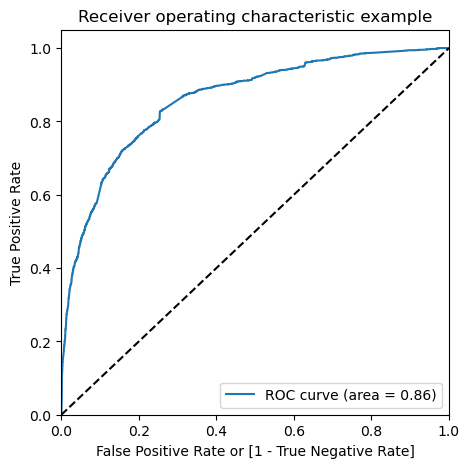

In [134]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [135]:
# Let's create a column with different cut off probability
numbers = [float(x)/10 for x in range(10)]
for i in numbers :
       y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5300,0,0.941113,1,1,1,1,1,1,1,1,1,1,1
2178,0,0.205137,0,1,1,1,0,0,0,0,0,0,0
8214,0,0.371932,0,1,1,1,1,0,0,0,0,0,0
8886,1,0.694060,1,1,1,1,1,1,1,1,0,0,0
7918,0,0.174747,0,1,1,0,0,0,0,0,0,0,0


In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[1,1]+cm1[0,0]) / total1
    sensi = cm1[1,1] / ( cm1[1,0] + cm1[1,1] )
    speci = cm1[0,0] / ( cm1[0,1] + cm1[0,0] )
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)    

     prob  accuracy     sensi     speci
0.0   0.0  0.389725  1.000000  0.000000
0.1   0.1  0.564954  0.972123  0.304934
0.2   0.2  0.691914  0.904421  0.556205
0.3   0.3  0.774794  0.833134  0.737538
0.4   0.4  0.789073  0.735962  0.822991
0.5   0.5  0.794040  0.661888  0.878433
0.6   0.6  0.778675  0.550378  0.924466
0.7   0.7  0.763619  0.470331  0.950916
0.8   0.8  0.735682  0.362405  0.974059
0.9   0.9  0.687723  0.213461  0.990590


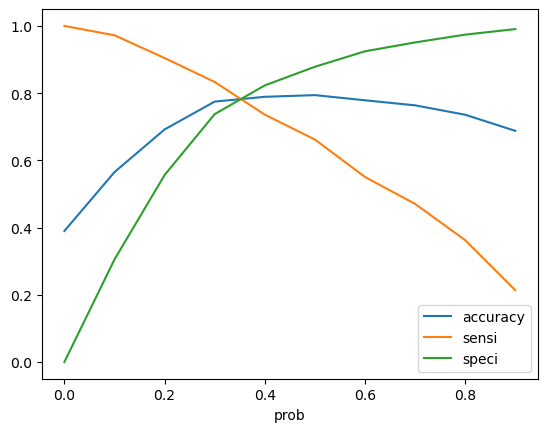

In [137]:
# let's plot accuracy, sensitivity, specificity against various probabilities
cutoff_df.plot.line(x='prob' , y=['accuracy', 'sensi', 'speci'])
plt.show()

As we can see from above code , o.3 can be taken as optimal probability

In [138]:
y_train_pred_final['final_prediction'] = y_train_pred_final.Converted_prob.map(lambda x : 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
5300,0,0.941113,1,1,1,1,1,1,1,1,1,1,1,1
2178,0,0.205137,0,1,1,1,0,0,0,0,0,0,0,0
8214,0,0.371932,0,1,1,1,1,0,0,0,0,0,0,1
8886,1,0.694060,1,1,1,1,1,1,1,1,0,0,0,1
7918,0,0.174747,0,1,1,0,0,0,0,0,0,0,0,0


In [139]:
# let's check overall accuracy
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_prediction)
accuracy

0.7747943504578613

In [140]:
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_prediction)
confusion_mat

array([[2900, 1032],
       [ 419, 2092]], dtype=int64)

In [141]:
Train_precision = confusion_mat[1,1] / ( confusion_mat[1,1] + confusion_mat[0,1] )
Train_precision

0.6696542893725992

In [142]:
Train_recall = confusion_mat[1,1] / ( confusion_mat[1,1] + confusion_mat[1,0] )
Train_recall

0.8331342094782955

## Step 12: Making predictions on the test set

In [143]:
y_test_pred = Model_05.predict(X_test_sm)
y_test_pred.head()

2399    0.745744
849     0.023885
7456    0.079145
6177    0.775939
4857    0.553931
dtype: float64

In [144]:
y_test_pred_final = pd.DataFrame({'Converted': y_test.values, 'Converted_prob': y_test_pred})
y_test_pred_final.head()

,Converted,Converted_prob
2399,1,0.745744
849,0,0.023885
7456,1,0.079145
6177,1,0.775939
4857,1,0.553931


In [145]:
y_test_pred_final['Final_prediction'] = y_test_pred_final.Converted_prob.map(lambda x : 1 if x > 0.3 else 0)
y_test_pred_final.head()

,Converted,Converted_prob,Final_prediction
2399,1,0.745744,1
849,0,0.023885,0
7456,1,0.079145,0
6177,1,0.775939,1
4857,1,0.553931,1


#### Assigning lead score 

In [146]:
y_test_pred_final['Prospect ID'] = y_test_pred_final.index
y_test_pred_final['Lead Score'] = y_test_pred_final.Converted_prob.map(lambda x : round(x*100))
y_test_pred_final.head()

,Converted,Converted_prob,Final_prediction,Prospect ID,Lead Score
2399,1,0.745744,1,2399,75
849,0,0.023885,0,849,2
7456,1,0.079145,0,7456,8
6177,1,0.775939,1,6177,78
4857,1,0.553931,1,4857,55


In [147]:
# let's check overall accuracy of model
test_accuracy = metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Final_prediction)
test_accuracy

0.779869659666908

In [148]:
# Checking confusion metrics
test_Cm = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Final_prediction)
test_Cm

array([[1296,  427],
       [ 181,  858]], dtype=int64)

In [149]:
TP = test_Cm[1,1] # true positive 
TN = test_Cm[0,0] # true negatives
FP = test_Cm[0,1] # false positives
FN = test_Cm[1,0] # false negatives

In [150]:
# Checking Sensitivity of model
test_sensitivity = TP / (TP + FN )
test_sensitivity

0.8257940327237728

In [151]:
# Checking Specificity
test_specificity = TN / (TN + FP)
test_specificity

0.7521764364480558

#### Final results on test model

In [152]:
print('Test_accuracy =' , round(test_accuracy,2))
print('Test_sensitivity =' , round(test_sensitivity,2))
print('Test_specificity =' , round(test_specificity,2))

Test_accuracy = 0.78
Test_sensitivity = 0.83
Test_specificity = 0.75


## Conclusion 

I.The Conversion rate calculated on basis of lead score on final prediction is 83 % and which meets the ballpark set by client CEO that conversion rate should be around 80 %

II.Good percentage of sensitivity shows that our model is good enough to predict most promising leads

III.Below are the top 3 features which are contributing more to get probability of lead conversion.
- Lead source
- Last activity
- Total time spent on website
